# Predicting insurance fraud using machine learning 


This will try to evaluate the possibility of fradulent claim for insurance based on past learning from millions of claims.  

Wer'e going to take the following appraoch 
1. Problem definition 
2. data 
3. evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem Definition 
in a statement :
> Given application data, can we predict possible fradud i n insurance claim .m 

## 2. Data 

The original data came from easily searchable resources on kaggle or uci data repository 

## 3. Evaluation
> It needs to be very accurate, the PoC should reach 95% or higher accuracy 

## 4. Features 
create a data dictionary 


In [2]:
## preparing our tools 
## We are going to use pandas, numpy, matplotlib for data analysis and manipulation 
#data analysis and manipulation 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Models from scikit learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#Model Evaluation 
from sklearn. model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve 


### Load Data

In [10]:
df = pd.read_csv("data/insuranceFraud.csv")
df.shape

(1000, 39)

### Data Exploration ( exploratory data analysis or EDA) 
The goal here is to find out more about the data and become a subject matter expert on the dataset 
* What questions are you trying to solve 
* what kind of data do you have and how do we trat different types 
* What's missing from the data and how do you deal with it 
* Where are the outliers and why should you care about them 
* How can you add, change or remove features to get more out of our data 


In [3]:
# Lets find out how many of each class is there 
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

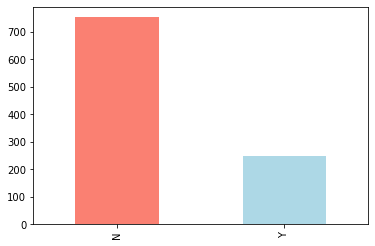

In [4]:
df["fraud_reported"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


### Data Preprocessing


In [20]:
# Drop the unnecessary columns from the dataframe 
cols_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
df.drop(columns=cols_drop,inplace=True);

KeyError: "['policy_number' 'policy_bind_date' 'policy_state' 'insured_zip'\n 'incident_location' 'incident_date' 'incident_state' 'incident_city'\n 'insured_hobbies' 'auto_make' 'auto_model' 'auto_year'] not found in axis"

In [43]:
# Misisng values are denoted by ? in the given dataset, we will replace it by NaN so that they can be handled at some stage. 

df = df.replace('?',np.nan)

# Are there any missing values 
df.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [44]:



df["collision_type"].fillna("missing",inplace=True)
df["property_damage"].fillna("missing",inplace=True)
df["police_report_available"].fillna("missing",inplace=True)



In [17]:
# extracting categorical values 

cat_df = df.select_dtypes(include=['object']).copy()

In [18]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [27]:
for col in cat_df.columns:
    print(col,':',len(cat_df[col].unique()),'labels')

policy_csl : 3 labels
insured_sex : 2 labels
insured_education_level : 7 labels
insured_occupation : 14 labels
insured_relationship : 6 labels
incident_type : 4 labels
collision_type : 4 labels
incident_severity : 4 labels
authorities_contacted : 5 labels
property_damage : 3 labels
police_report_available : 3 labels
fraud_reported : 2 labels


### Encoding categorical data 

In [45]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [46]:

# auto encoding of categorical variables
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [47]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces_1,insured_occupation_craft-repair_1,insured_occupation_exec-managerial_1,...,incident_type_Parked Car_1,incident_type_Single Vehicle Collision_1,incident_type_Vehicle Theft_1,collision_type_Rear Collision_1,collision_type_Side Collision_1,collision_type_missing_1,authorities_contacted_Fire_1,authorities_contacted_None_1,authorities_contacted_Other_1,authorities_contacted_Police_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [35]:

# extracting the numerical columns
num_df = df.select_dtypes(include=['int64']).copy()

In [36]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [48]:

# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [38]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_missing,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,1,0,0,1,0,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,1,0,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,1,0,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,1,0,0,1,0,1,0,0


### Data Exploration

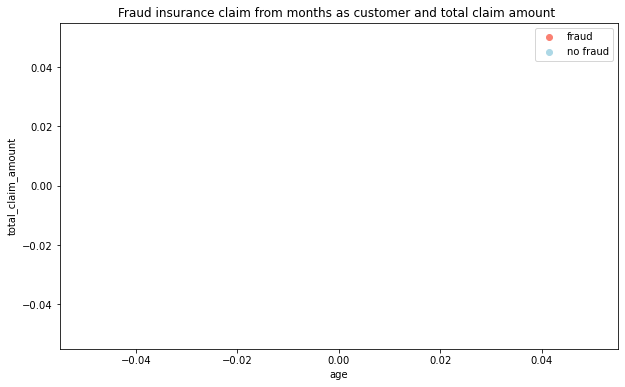

In [8]:
#create another figure 

plt.figure(figsize=(10,6))

#scatter with positive examples 
plt.scatter(df.age[df.fraud_reported==1], df.total_claim_amount[df.fraud_reported==1],c="salmon")

#scatter with negative examples 
plt.scatter(df.age[df.fraud_reported==0],df.total_claim_amount[df.fraud_reported==0],c="lightblue")

#add some helpful info 
plt.title("Fraud insurance claim from months as customer and total claim amount ")
plt.xlabel("age")
plt.ylabel("total_claim_amount")
plt.legend(["fraud","no fraud"]);

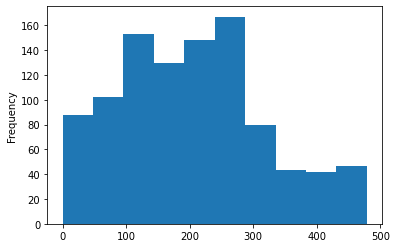

In [17]:
# check the distributon of age column with a histogram 
df.	months_as_customer.plot.hist();

In [9]:
#draw a correlation matrix 
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527


C:\Users\neeti\miniconda3\lib\site-packages\seaborn\matrix.py:308: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


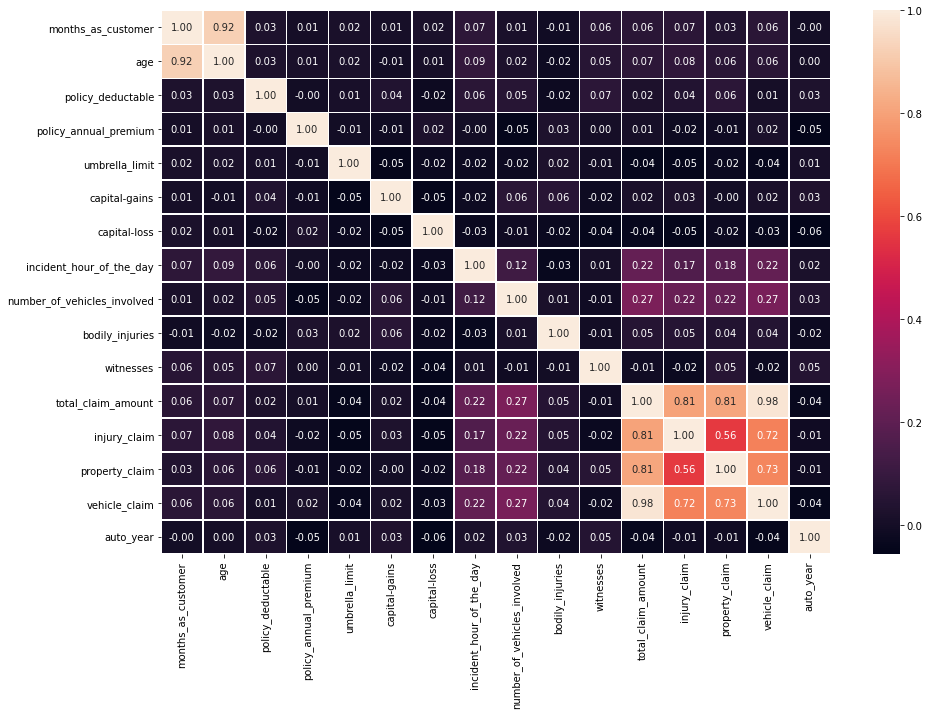

In [10]:
# making correlation matrix prettier using seaborn's heat map 
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              Cmap="YlGnBu");

## 5.0 Modelling

In [49]:
# split data into features and labels 



# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

#split into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#initialize estimator
clf = RandomForestClassifier(n_estimators=100)

#fit into the model
clf.fit(x_train,y_train)
clf.score(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Now we have got our data split into training and testing data , so let's build a  model

We will train it ( find the patterns) 
ad test it ( try the patterns on test data )

We are going to use three different Machine learning models : 
1. Logistic Regression 
2. K Nearest neighbur 
3. Random Forest classifier 

In [40]:
# create a dictionary of models 

models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest Classifier":RandomForestClassifier()}

#define a function to train and test the models 

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different classification models 
    x_train = training data - no labels 
    x_test = testing data , no labels 
    y_train = training label 
    y_test = testing labels 
    
    """
    # set a random seed 
    np.random.seed(42)
    
    # make a dictionry to keep model scores 
    model_scores ={}
    #loop through models 
    for name, model in models.items():
        #fit the model to the data 
        model.fit(x_train,y_train)
        
        #evaluate the model and append it's score to model_scores 
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [23]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

ValueError: could not convert string to float: '8/7/1991'

### Model Commparison

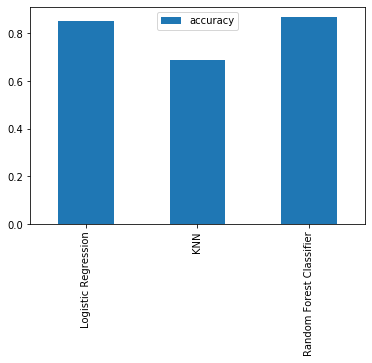

In [20]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

### Now we have a baseline model, but we know that a baseline model is not what we can depen on, what should we do 

Let's look at the followinng 
* Hyperparameter Tuning 
* Feature importance 
* Confusion Matrix
* Cross Validation 
* Precision 
* Recall 
* F1 score 
* Classification report 
* ROC curve 
* Area under the curve (AUC) 

## Hyperparameter Tuning 

Let's tune KNN

### By Hand

In [21]:
#Let's train KNN

train_scores=[]
test_scores=[]

# create a list of different values for n_neaighbours 
neighbors = range(1,21)

#setup KNN instance 
knn= KNeighborsClassifier()

# loop through different n neighbours 

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm 
    knn.fit(x_train,y_train)
    
    #Update the training scores list 
    train_scores.append(knn.score(x_train,y_train))
    
    #update the test scores list 
    test_scores.append(knn.score(x_test,y_test))
    
    

In [22]:
train_scores

[1.0,
 0.8057851239669421,
 0.7768595041322314,
 0.7644628099173554,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.743801652892562,
 0.71900826446281,
 0.71900826446281,
 0.7107438016528925,
 0.6942148760330579,
 0.6859504132231405,
 0.7066115702479339,
 0.6776859504132231,
 0.6776859504132231,
 0.6652892561983471,
 0.6694214876033058,
 0.6859504132231405,
 0.6735537190082644]

In [23]:
test_scores

[0.5737704918032787,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836]

The highest score for test data 72.13


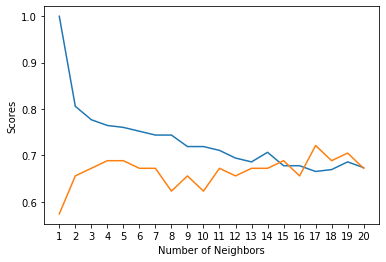

In [24]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
print(f"The highest score for test data {max(test_scores)*100:.2f}")
           

### Hyperparammeter Tuning with randomizedSearchCV
On two estimators :
    * LogisticRegression()
    * RandomForestClassifier()

In [44]:
# Creating a hyperparameter grid for logistics regression 
log_reg_grid = {"C": np.logspace(-4,4, 20),
               "solver": ["liblinear"]}

#Hyperparameter grid for randomForest classifier 
rf_grid ={"n_estimators": np.arange(10,1000, 50),
              "max_depth": [None,2,5,10],
              "min_samples_split": np.arange(2,20, 2),
               "min_samples_leaf": np.arange(1,20, 2)
         }

### now we have a hyperparametr grid set up for each of our models, let's tune them using RandomizedSearch CV 


In [31]:
#Tune Logistics regression 

np.random.seed(42)

#setup random hyperparameter search for logistics regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions =log_reg_grid, 
                                cv=5, n_iter=20, 
                                verbose=True)

# Fit data into random search CV 
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [42]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

### Now let's do the same for RandomForestClassifier()


In [46]:
# setup random seed 
np.random.seed(42)

#setup random hyperparameters search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                          cv=5,
                           n_iter=20,
                          verbose= True)

## fit data into random search CV 

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [47]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [48]:
rs_rf.score(x_test,y_test)

0.8524590163934426

### Since Logistic regression gave the best result so far, we will do grid hyperparameter tuning of that model 

In [13]:
## Hyperparameter tuning with grid search CV 
log_reg_grid = {"C": np.logspace(-4,4, 30),
               "solver": ["liblinear"]}


# setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid =log_reg_grid,
                         cv=5,
                         verbose=True)

#fit it into the model 
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.6s finished


In [14]:
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [15]:
gs_log_reg.score(x_test,y_test)

0.819672131147541

## Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC curve
* Confusion Matrix 
* Classification Report 
* Precision 
* recall 
* F1_score

and it would be great if cross_validation can be used where possible 


In [17]:
# make predictions with the tuned model 
y_preds = gs_log_reg.predict(x_test)

In [18]:
y_preds

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

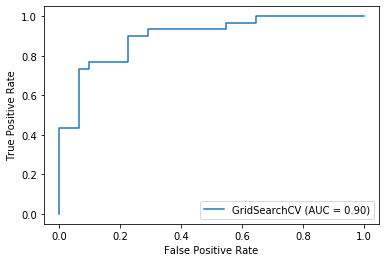

In [19]:
## Plot ROC curve and calculate the AUC metric 
plot_roc_curve(gs_log_reg,x_test,y_test)

In [57]:
# confusion matrix 

print(confusion_matrix(y_test,y_preds))

[[27  7]
 [ 2 25]]


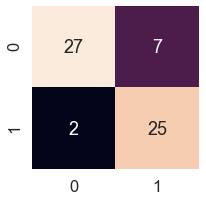

In [61]:
sns.set(font_scale =1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plotting a nice looking graph 
    """
    
    fig, ax= plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel="True label"
    plt.ylabel="Predicted label"
    
plot_conf_mat(y_test, y_preds)

## Now we have ROC curve , auc metric and confusion matrix, let's build a classification report as well as cross calidated precision, recall and f1 scores 

In [20]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



## calculate evaluation matroix using cross validation , calculate precision, recall and f1 score of our model using cross vaidated score 

In [22]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [26]:
#create a new classifier with best params 
clf = LogisticRegression(C=2.592943797404667, solver ="liblinear")


#cross validated accuracy 
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc =np.mean(cv_acc)
cv_acc





0.8248633879781421

In [31]:
#cross validated precision

cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision
 

0.8188009641520078

In [34]:
# cross validated recall 
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall



0.8787878787878787

In [35]:
#cross validated f1_score
cv_f1= cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8464039460644465

In [39]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "f1":cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.824863,0.818801,0.878788,0.846404


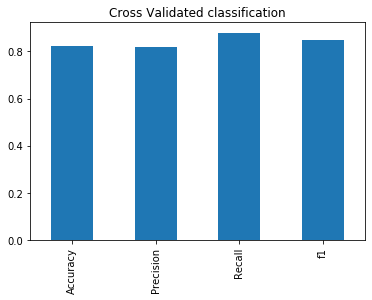

In [41]:
cv_metrics.T.plot.bar(title="Cross Validated classification",
                     legend=False);

### Feature Importance 
Which characteristics are most important in predicting the target variable.
Finding feature importance is different for each mahine learning model. 

In [43]:
# fit an instance of logistic regression 

clf = LogisticRegression(C=2.592943797404667, solver ="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=2.592943797404667, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
clf.coef_

array([[ 0.00716113, -1.73312697,  0.64177988, -0.01603756, -0.00466315,
         0.02366825,  0.49648498,  0.03323643, -0.86849235, -0.76996141,
         0.26820585, -0.84291148, -0.64877087]])

In [46]:
# match coefs of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.007161133155111871,
 'sex': -1.7331269696997014,
 'cp': 0.6417798819081604,
 'trestbps': -0.016037555697430657,
 'chol': -0.004663151135719189,
 'fbs': 0.02366825072403405,
 'restecg': 0.4964849756852206,
 'thalach': 0.033236432941134625,
 'exang': -0.8684923483051303,
 'oldpeak': -0.7699614136169329,
 'slope': 0.26820585378536566,
 'ca': -0.8429114804957155,
 'thal': -0.6487708747474374}

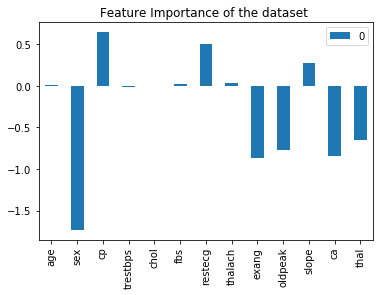

In [47]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance of the dataset ");